<a href="https://colab.research.google.com/github/rathsandhya1/Salary-Prediction-Portfolio/blob/main/Salary_Prediction_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


Author -  Sandhyarani Rath
email -rathsandhya1@gmail.com

# **Salary Predictions Based on Job Descriptions**

#  1. DEFINE 


The purpose of this project is to make accurate salary preditctions that are based on existing known salaries so that company is able to recruit and retain top talent. This model will help the company for offering competetive pay to existing and future employees while also keeping payroll expenses in check.



In [ ]:
#import  libraries
import pandas as pd
import numpy as np
import sklearn as sk
#Vizualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.impute import SimpleImputer
#Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/cdrive')



Mounted at /cdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.**Discover**

  

In [ ]:
test_features_df=pd.read_csv('/content/drive/My Drive/sample_data/test_features.csv')
train_features_df=pd.read_csv('/content/drive/My Drive/sample_data/train_features.csv')
train_salaries_df=pd.read_csv('/content/drive/My Drive/sample_data/train_salaries.csv')

# **Data Preparation**


**Define relevant functions needed in the span of the project**

In [ ]:
#clean the data - remove duplicates and salaries that are $0
def clean_d(original_df):
    clean_d = original_df.drop_duplicates(subset='jobId')
    clean_d = original_df[original_df.salary>0]
    return clean_d
    #scatter plots 
def scatter_data(df, col):
    plt.figure(figsize = (12,8))
    plt.scatter(df[col], df['salary'] )
    plt.ylabel('salary')
    plt.xlabel(col)

#regression plots
def reg_data(df, col):
    plt.figure(figsize=(12,8))
    sns.regplot(x=df[col], y = df['salary'], data = df, line_kws = {'color' : 'red'})    
    plt.ylim(0,)
    
#residual plots 
def res_data(df,col):
    plt.figure(figsize=(12,8))
    sns.residplot(x=df[col], y = df['salary'], data = df)
    plt.show()
#distribution plots 
def dis_data(Rfunction, Bfunction, Rname, Bname, title):
    plt.figure(figsize=(10,6))
    ax1 = sns.distplot(Rfunction, hist = False, color = 'r', label = Rname)
    ax1 = sns.distplot(Bfunction, hist = False, color = 'b', label = Bname)
    plt.title(title)
    plt.show()
    plt.close()    

# **Examine the Data**

In [ ]:
train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [ ]:
train_salaries_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [ ]:
test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


## Use info() to see the length and dtypes

In [ ]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [ ]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [ ]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


**Check for duplicates**

In [ ]:
train_features_df.duplicated().sum()

0

In [ ]:
train_salaries_df.duplicated().sum()

0

In [ ]:
test_features_df.duplicated().sum()

0

In [ ]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [ ]:
#Define Variables
cat_vars=['companyId','jobType','degree','major','industry']
num_vars=['yearsExperience','milesFromMetropolis']
tar_var='Salary'

In [ ]:
#summarize numerical and categorical variables separately
train_features_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [ ]:
train_features_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685171864,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


Merge features and salaries into single df

In [ ]:
#merge training data with features and training data with salary - store in train_df
train_df=pd.merge(train_features_df,train_salaries_df,on= 'jobId')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [ ]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [ ]:
#Checking for any missing values in the newly merged dataset
train_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
#store the the salaries in the training data which are less than or equal to 0
sal = train_df['salary']<=0
inval = train_df[sal]
inval

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [ ]:
print(train_df.dtypes)

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object


In [ ]:
#clean the data i.e, remove duplicates and remove the salaries that are invalid or not useful for predictions like 
#salary<=0
clean_train_df = clean_d(train_df)

In [ ]:
print(clean_train_df.shape)

(999995, 9)


In [ ]:
#Reset the index values after dropping the invalid values 
clean_train_df=train_df.copy()
clean_train_df.tail()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149
999999,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20,11,88


In [ ]:
print (clean_train_df.dtypes)

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object


**Exploratory Data Analysis**


Descriptive statistics of quantitative data

In [ ]:
#Summary statistics for numerical data
clean_train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [ ]:
#Count unique values in categorical data
for cat in cat_vars:
    if cat!='jobId'and cat!='companyId':
        print(clean_train_df[cat].value_counts())#Count unique values in categorical data


SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64
HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64
NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64
WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


In [ ]:
# Unique values of clean_train_df data
clean_train_df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

**There is a unique jobId for each row in the data and so it will be dropped to reduce the noise in the prediction.**

In [ ]:
#checking plot skewness and kurtosis
print('salary skewness:',clean_train_df ['salary'].skew())
print('salary kurtosis:',clean_train_df ['salary'].kurt())
print('\n')
if -0.5<=clean_train_df['salary'].skew()<=0.5:
    print('we can conclude that salary distribution is approximately symmrtric')
elif-0.5 > clean_train_df['salary']>0.5:
        print('we can conclude that salary distribution is skewed')
        

salary skewness: 0.346415074651208
salary kurtosis: -0.025578660590093172


we can conclude that salary distribution is approximately symmrtric


In [ ]:
#We use IQR Rule to identify potential outliers 

stats =clean_train_df['salary'].describe()
IQR = stats['75%'] - stats['25%']
upper_bound = stats['75%'] + 1.5 * IQR
lower_bound = stats['25%'] - 1.5 * IQR
print( 'The upper and lower bounds of possible outliers are', (upper_bound ,lower_bound))
stats

The upper and lower bounds of possible outliers are (220.5, 8.5)


count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

**Visualizing target variable(salary)**

**Created visualizations to explore the salary variable and examine the potential existance of outliers or corrupt data. Further visualized the reationship between the salary and feature variables and relation between features.** 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


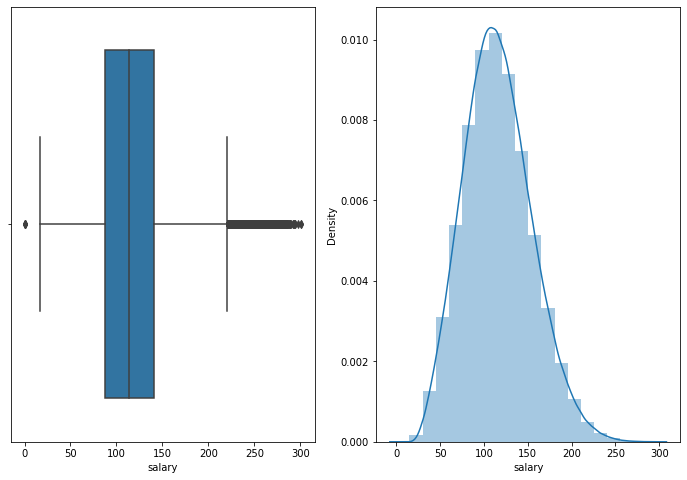

In [ ]:
#Defining plotting function
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(clean_train_df['salary'])
plt.subplot(1,2,2)
sns.distplot(clean_train_df['salary'],bins=20)
plt.show()

In [ ]:
# Examine the outliers below the lower bound- 
clean_train_df[clean_train_df.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


It can be seen that these are missing data because when we look years of experience columns, all having years of experience but salary is zero. So we should drop this missing value from the traning data

In [ ]:
#Examine potential outliers above the upper bound - 
clean_train_df.loc[train_df['salary'] > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

All the senior position from CEO  to SENIOR, that they earn higher salary. But JUNIOR roles also earn higher salary.That's why we need to further investigate to make sure if it is genuine and perfect data.

In [ ]:
clean_train_df[(clean_train_df.salary > 222.5) & (clean_train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


We can include these in our analysis that it is expected to have master/Doctoral and most of the roles have higher pay. It also indicate that only OIL and FINANCE industry offer higher salary.So we determine not to remove these outliers from the training data set.

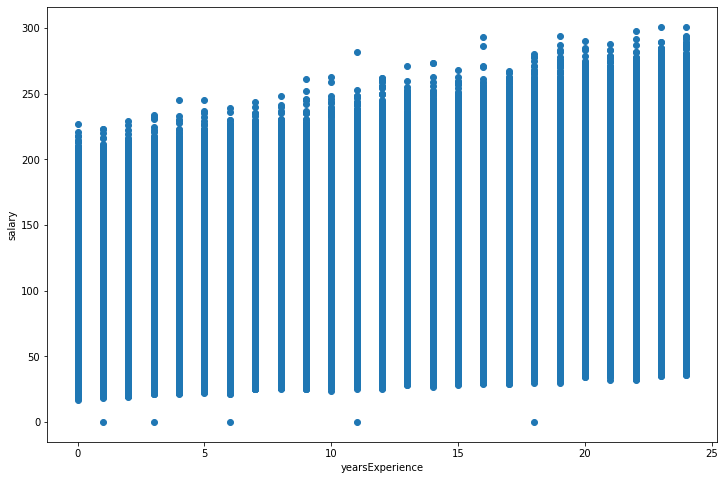

In [ ]:
scatter_data(clean_train_df, 'yearsExperience')


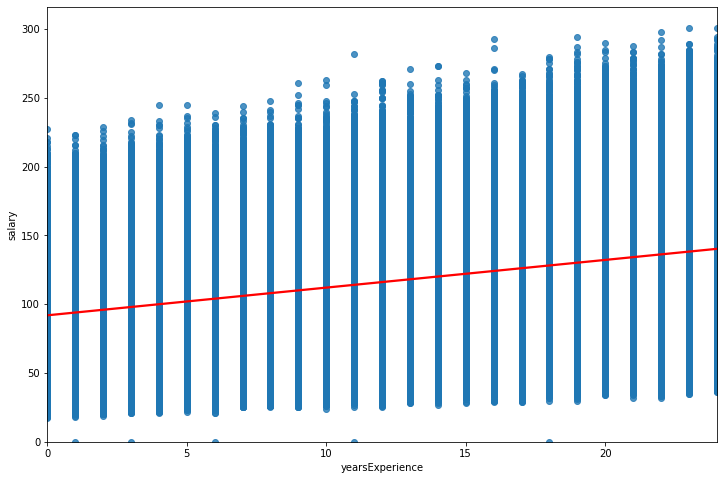

In [ ]:
#Fit a regression line to years experience to visualize it as a predictor of salary - 
reg_data(clean_train_df, 'yearsExperience')

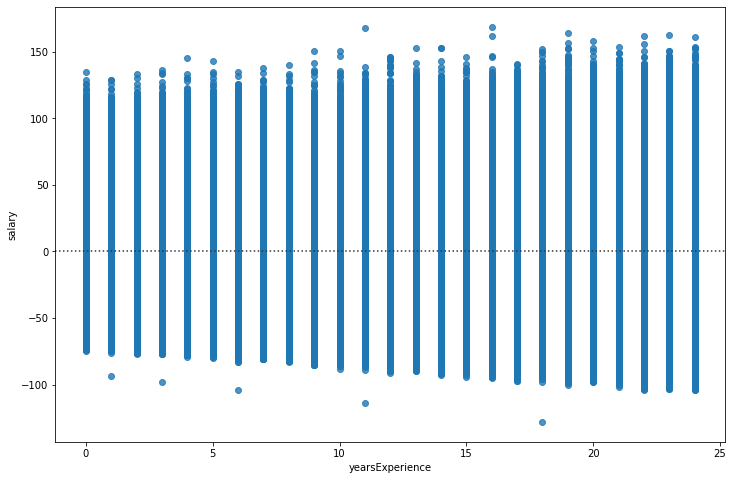

In [ ]:
#Variance of yearsExperience-
res_data(clean_train_df, 'yearsExperience')

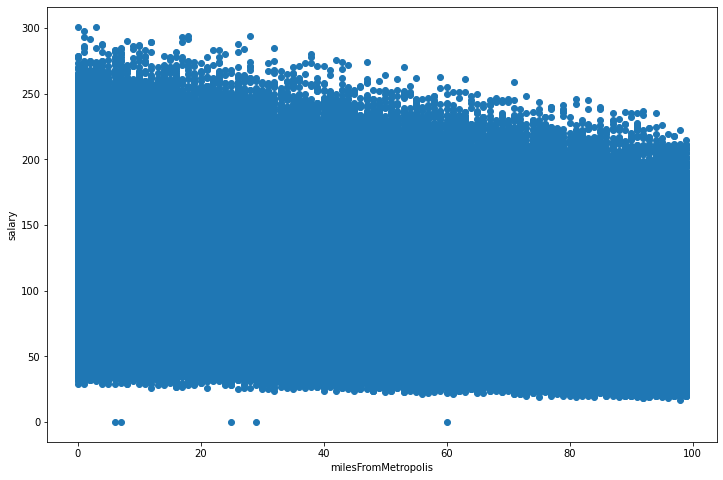

In [ ]:
scatter_data(clean_train_df, 'milesFromMetropolis')

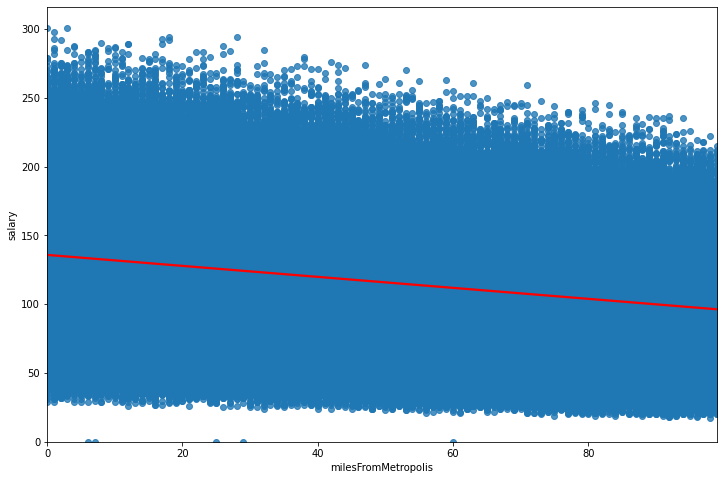

In [ ]:
#Fit a regression line to miles from metropolis to visualize it as a predictor of salary -
reg_data(clean_train_df, 'milesFromMetropolis')


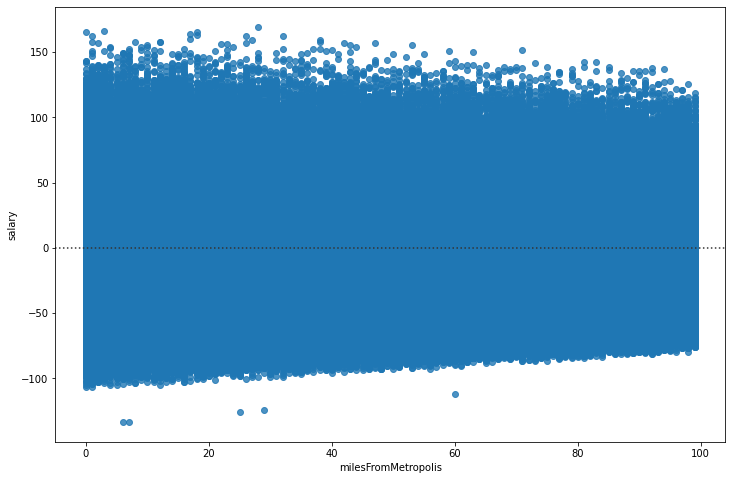

In [ ]:
#Variance of milesfrom Metropolis
res_data(clean_train_df, 'milesFromMetropolis')

In [ ]:
# define a function to encode the categorical variables 
def Encode_loc(dataframe):   
    for col in dataframe.columns:        
        if dataframe[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            dataframe[col]=le.fit_transform(dataframe[col])
    return dataframe

def Display_Correlation(EncodedData):
    plt.figure(figsize=(12,10))
    corr = EncodedData.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns,cmap="PRGn",annot=True,vmin=-1, vmax=1,linewidths=2.5,linecolor='black')
    plt.show()

In [ ]:
#check that the data is encoded correctly 
EncodedData = Encode_loc(clean_train_df)
#drop jobId because it is unique for each row
EncodedData=EncodedData.drop(['jobId'],axis=1)
EncodedData

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,31,1,3,6,3,10,83,114
1,11,0,2,7,6,3,73,85
2,48,7,1,8,3,10,38,121
3,32,5,1,2,0,8,17,126
4,60,7,0,8,2,8,16,147
...,...,...,...,...,...,...,...,...
999995,52,7,0,2,3,19,94,72
999996,17,2,2,7,2,12,35,144
999997,16,4,2,7,1,16,81,48
999998,23,1,3,7,3,6,5,133


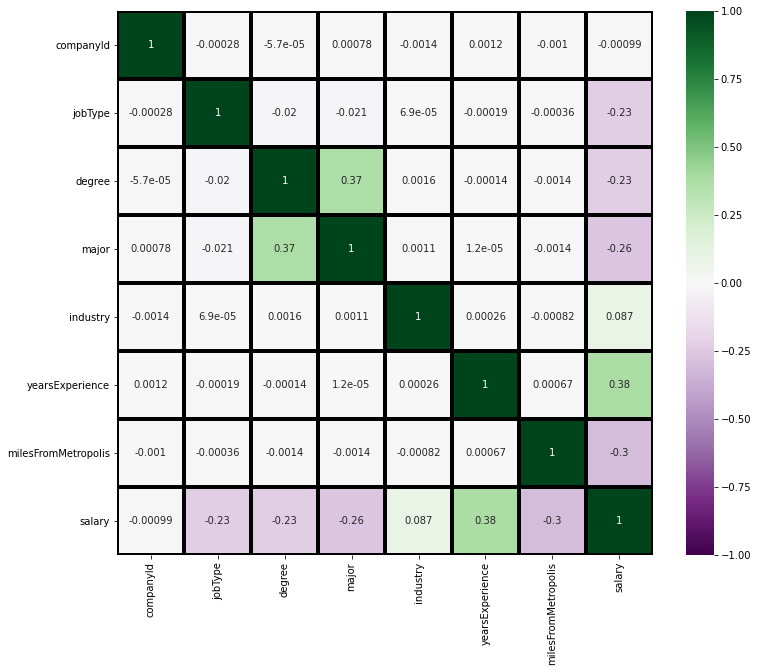

In [ ]:
Display_Correlation(EncodedData)

# The heatmap shows that degree and major are highly correlated.The salary is normally distributed. 



In [ ]:
# drop jobId and companyId 
clean_train_df.drop(['jobId'], axis = 1, inplace = True)
clean_train_df.drop(['companyId'], axis = 1, inplace = True)

In [ ]:
clean_train_df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,1,3,6,3,10,83,114
1,0,2,7,6,3,73,85
2,7,1,8,3,10,38,121
3,5,1,2,0,8,17,126
4,7,0,8,2,8,16,147


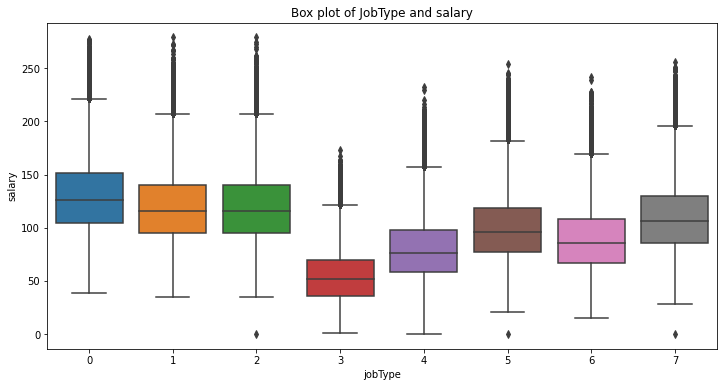

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= "jobType",y = "salary" , data=clean_train_df.sort_values('salary',ascending = True))
plt.title('Box plot of JobType and salary')
plt.show()

We can see a clear positive correlation between jobType and salary. The highest salaries are CEO, followed by CTO and CFO. The lowest salary is for the jobtype Janitor. Distributions appear normal.

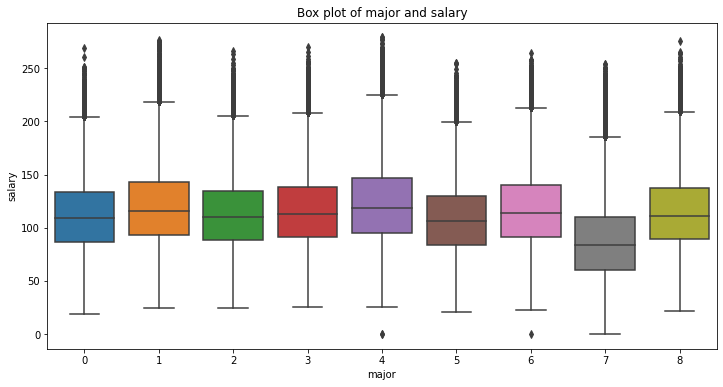

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= "major",y = "salary" , data=clean_train_df)
plt.title('Box plot of major and salary')
plt.show()

We can see that people with majors such as engineering, business and math have higher salaries. Also, having a major definitely leads to having higher salaries than having no major. Having no major corresponds to people following in the group of no degree and those with only none. Distributions appear normal.

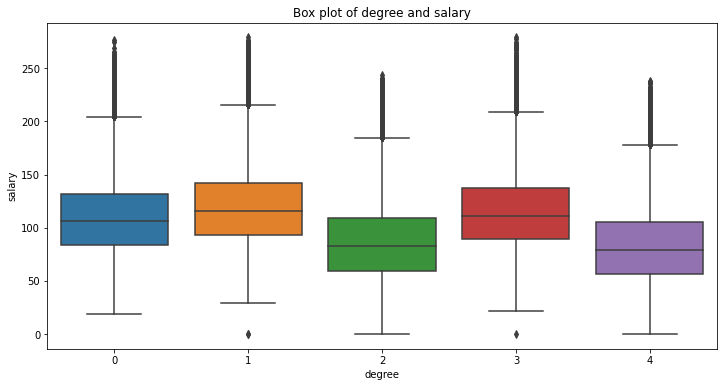

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= "degree",y = "salary" , data=clean_train_df)
plt.title('Box plot of degree and salary')
plt.show()

We can see that having masters and doctoral corresponds to having higher salaries than high school or none. Salary seems to increase with the advance in degrees.

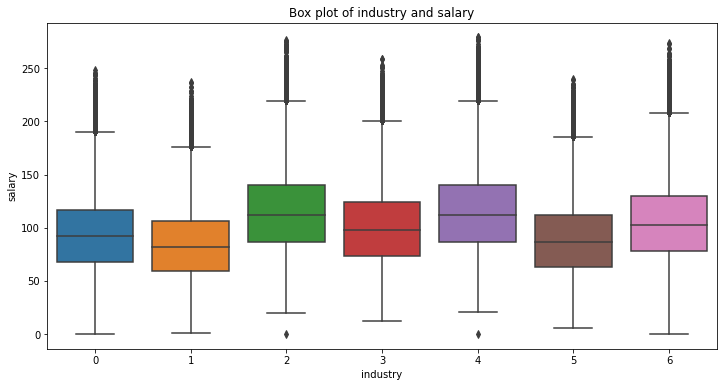

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= "industry",y = "salary" , data=clean_train_df.sort_values('salary',ascending = True))
plt.title('Box plot of industry and salary')
plt.show()

Industries such as Oil and Finance pay the highest. Education industry seems to pay the lowest.






Now dummy variables will be assigned to categorical data ("one-hot encoding") so it can be used in the prediction models.

In [ ]:
## One-hot encode categorical data in clean_train_df dataset
clean_train_df = pd.get_dummies(clean_train_df)

In [ ]:
clean_train_df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,1,3,6,3,10,83,114
1,0,2,7,6,3,73,85
2,7,1,8,3,10,38,121
3,5,1,2,0,8,17,126
4,7,0,8,2,8,16,147


# Preparing Data for Machine Learning Model

In [ ]:
mms = MinMaxScaler()

clean_train_df[['yearsExperience','milesFromMetropolis']] = mms.fit_transform(clean_train_df[['yearsExperience','milesFromMetropolis']])

In [ ]:
num_var = ['yearsExperience', 'milesFromMetropolis', 'salary']

cat_var = ['jobType','degree', 'major','industry']
categorical_df = pd.get_dummies(train_df[cat_var], drop_first=True)
numerical_df = train_df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.shape


(1000000, 28)

In [ ]:
# Create independent and dependent variables in train dataset
x_IV = new_df.iloc[:,:27]
y_DV = new_df.iloc[:,-1]
print("x_IV : ",x_IV.shape)
print("y_DV : ",y_DV.shape)

x_IV :  (1000000, 27)
y_DV :  (1000000,)


In [ ]:
#validating shapes of train and test sets
feature_train, feature_test, salary_train, salary_test = train_test_split(x_IV,y_DV,test_size=0.3, random_state=0)
print("feature training set shape:",feature_train.shape)
print("feature testing set shape:",feature_test.shape)
print("target training set shape:",salary_train.shape)
print("target testing set shape:",salary_test.shape)


feature training set shape: (700000, 27)
feature testing set shape: (300000, 27)
target training set shape: (700000,)
target testing set shape: (300000,)


In [ ]:
salary_test.head()

157105     98
374554    103
688694    205
265381    144
955415     71
Name: salary, dtype: int64


#3. **DEVELOP**


---- 6 Hypothesize solution ----
I have seleted 3 following models and going to test which model gives the least mean square error-

1.Linear Regression-it works well with large dataset,easy to understand and explain

2.GradientBoostingRegressor - It trains many models in additive/sequential manner by converting weak learners into strong learners

3.Random Forest - It is combination of Decision trees that can be best model for prediction.

Main goal is to find best model that has MSE below 360 

# **LINEAR REGRESSION**

In [ ]:
#fitting the regression model
lr = LinearRegression()
lr.fit(feature_train,salary_train)
lr.score(feature_train,salary_train)


0.7433960285571752

In [ ]:
y_hat=lr.predict(feature_test)
y_hat

array([ 99.06905367,  96.61356159, 176.51422754, ...,  80.72852249,
       115.67519949, 181.64458288])

In [ ]:
#Find MSE
mse_lr = mean_squared_error(salary_test,y_hat)
mse_lr



383.46083678738836

In [ ]:
#we will create new pandas dataframe with model name and its MSE results
results = pd.DataFrame(columns=['Model','MSE'])

In [ ]:
#naming the columns and append results
lr_row = {'Model':'Linear Regression','MSE': mse_lr}
results = results.append(lr_row, ignore_index=True)

In [ ]:
results

,Model,MSE
0,Linear Regression,383.460837


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


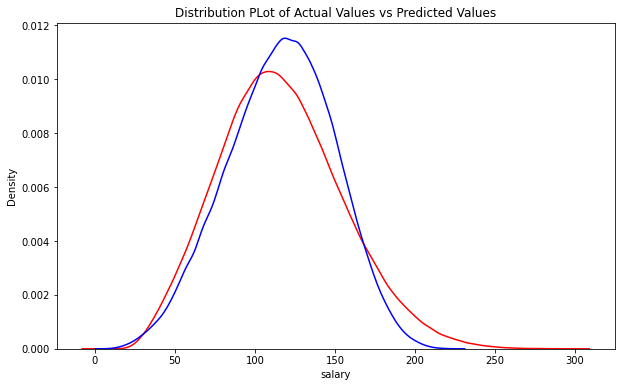

In [ ]:
#distribution plot 
Title = 'Distribution PLot of Actual Values vs Predicted Values'
dis_data(salary_train, y_hat, 'Actual Values(train data)', 'Predicted Values(train data)', Title)

We can see that the actual values and predicted values are not that different. The mean of the predicted values seems higher and the range seems lower.

# **GradientBoostingRegressor**

In [ ]:
#creating GradientBoostingRegressor object
gbr = GradientBoostingRegressor(n_estimators=120, max_depth=5, loss='ls',verbose=0)
neg_mse_gbr = cross_val_score(gbr,feature_test,salary_test,cv=5,scoring='neg_mean_squared_error')
gbr_mse = -1.0*np.mean(neg_mse_gbr)
gbr_mse


362.91008351702266

In [ ]:
#Fitting object to data
gbr.fit(feature_train,salary_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Making predictions and calculating MSE
gbr_pred=gbr.predict(feature_test)
mean_squared_error(gbr_pred,salary_test)

362.4326032445199

In [ ]:
#appending the results 
boost_row = {'Model':'Gradient Boosting','MSE': gbr_mse}
results = results.append(boost_row, ignore_index=True)

# **Random Forest** 

In [ ]:
#Creating a Random forest object
rf = RandomForestRegressor(n_estimators=170, n_jobs=2, max_depth=30, 
                           min_samples_split=60, max_features='auto', verbose=0)
#calculating the cross val score of random forest                         
neg_mse= cross_val_score(rf,feature_test,salary_test,cv=5,scoring='neg_mean_squared_error')
rf_mse = -1.0*np.mean(neg_mse)
rf_mse

376.1590980829406

In [ ]:
#appending the results 
rf_row = {'Model':'Random Forest','MSE': rf_mse}
results = results.append(rf_row, ignore_index=True)

In [ ]:
#The model which gives us the lowest mean square error is the best model 
mse_lr = "Linear Regression"
rf_mse = "Random Forest"
gbr_mse = "Gradient Boosting"
model = min(mse_lr,rf_mse,gbr_mse)
model

'Gradient Boosting'

# **4.DEPLOY**

In [ ]:
test_df = test_features_df.copy()

In [ ]:
#Preparing the data for analysis, creating dummies for categorial variable and scaling numeric varibales
num_test = ['yearsExperience', 'milesFromMetropolis']
cat_test = ['jobType','degree', 'major','industry']

mms1 = MinMaxScaler()
categorical_df = pd.get_dummies(train_df[cat_test], drop_first=True)
numerical_df = train_df[num_test]
feature_test = pd.concat([categorical_df,numerical_df], axis=1)
feature_test.shape


(1000000, 27)

In [ ]:
feature_test.head(5)

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,10,83
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3,73
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,10,38
3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8,17
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,8,16


In [ ]:
#Rename columns after scaling 
feature_test= feature_test.rename(columns={0:'milesFromMetropolis',1:'yearsExperience'})
feature_test.head(5)

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,10,83
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3,73
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,10,38
3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8,17
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,8,16


In [ ]:
feature_test.isnull().sum()

jobType_CFO               0
jobType_CTO               0
jobType_JANITOR           0
jobType_JUNIOR            0
jobType_MANAGER           0
jobType_SENIOR            0
jobType_VICE_PRESIDENT    0
degree_DOCTORAL           0
degree_HIGH_SCHOOL        0
degree_MASTERS            0
degree_NONE               0
major_BUSINESS            0
major_CHEMISTRY           0
major_COMPSCI             0
major_ENGINEERING         0
major_LITERATURE          0
major_MATH                0
major_NONE                0
major_PHYSICS             0
industry_EDUCATION        0
industry_FINANCE          0
industry_HEALTH           0
industry_OIL              0
industry_SERVICE          0
industry_WEB              0
yearsExperience           0
milesFromMetropolis       0
dtype: int64

In [ ]:
#Predicting results
salary_test =  pd.DataFrame(gbr.predict(feature_test))

In [ ]:
predict_df=pd.concat([test_features_df["jobId"],salary_test],axis=1)

In [ ]:
predict_df.head()

,jobId,0
0,JOB1362685407687,127.762274
1,JOB1362685407688,110.674105
2,JOB1362685407689,135.632043
3,JOB1362685407690,120.248701
4,JOB1362685407691,144.070375


In [ ]:
predict_df.to_csv('SalaryPrediction.csv', index = False)

**Plotting Feature Importance**

In [ ]:
importance = gbr.feature_importances_

In [ ]:
feature_importance = pd.DataFrame({'Feature':feature_test.columns, "Importance" : importance})
print(feature_importance)


                   Feature  Importance
0              jobType_CFO    0.000983
1              jobType_CTO    0.001119
2          jobType_JANITOR    0.242256
3           jobType_JUNIOR    0.101753
4          jobType_MANAGER    0.027736
5           jobType_SENIOR    0.061082
6   jobType_VICE_PRESIDENT    0.011756
7          degree_DOCTORAL    0.014376
8       degree_HIGH_SCHOOL    0.000150
9           degree_MASTERS    0.004638
10             degree_NONE    0.005752
11          major_BUSINESS    0.004435
12         major_CHEMISTRY    0.000966
13           major_COMPSCI    0.000164
14       major_ENGINEERING    0.006081
15        major_LITERATURE    0.001904
16              major_MATH    0.001549
17              major_NONE    0.081144
18           major_PHYSICS    0.000323
19      industry_EDUCATION    0.028076
20        industry_FINANCE    0.027870
21         industry_HEALTH    0.003022
22            industry_OIL    0.028357
23        industry_SERVICE    0.015796
24            industry_WE

In [ ]:
#Sorting values by ascending values
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.set_index('Feature', inplace=True, drop=True)


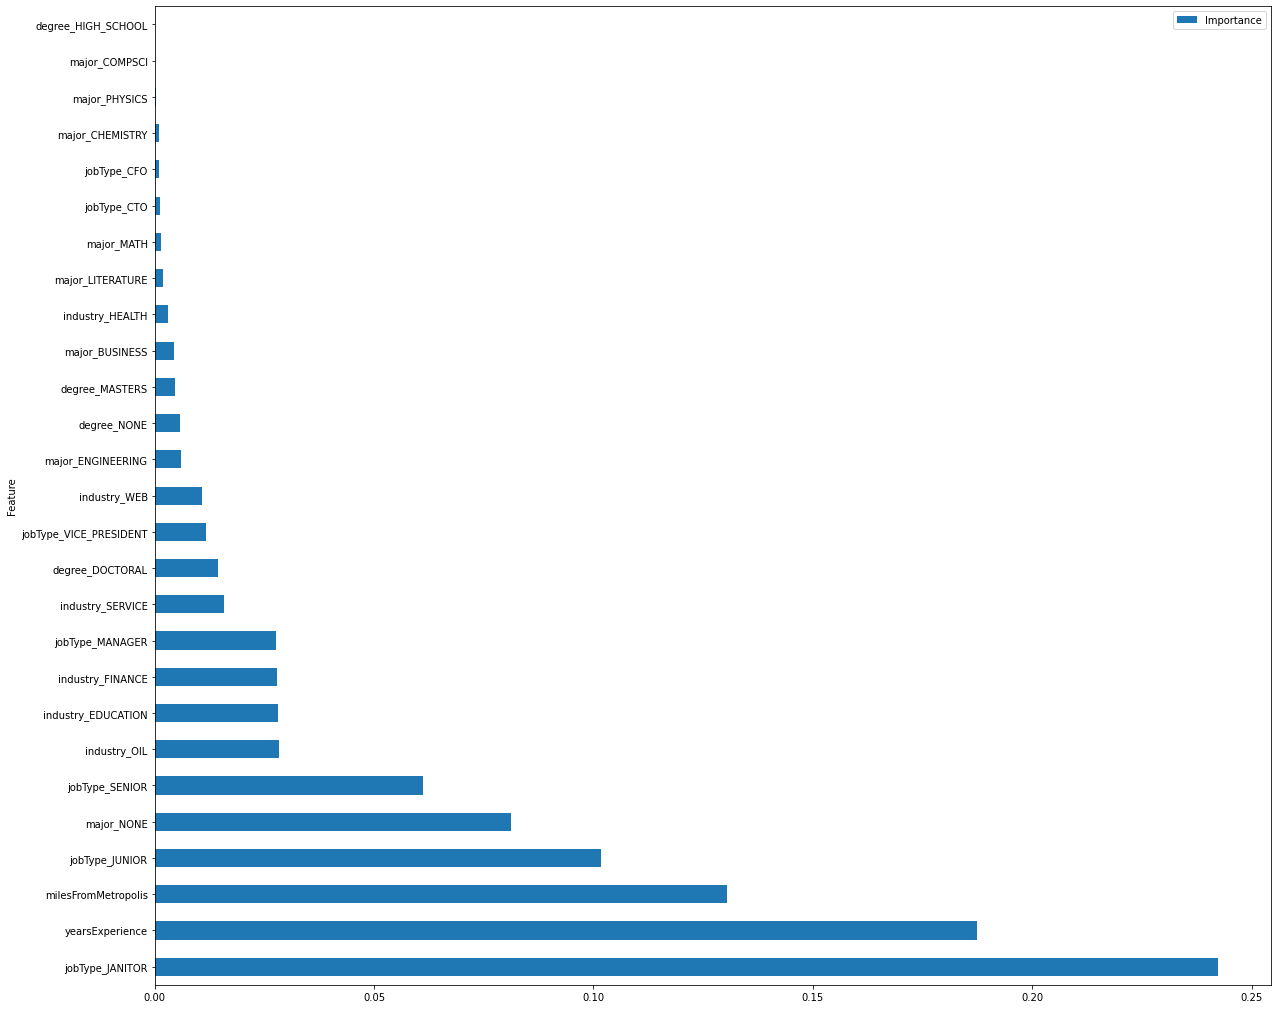

In [ ]:
feature_importance.plot(kind='barh',figsize=(20,18))